Data penjualan

In [8]:
import pandas as pd
data = {
    "Tanggal": ["2025-03-01", "2025-03-02", "2025-03-03", "2025-03-04", "2025-03-05", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-10"],
    "Produk": ["Royco", "Kangkung", "Bayam", " Cabai", "Jeruk", "Masako", "Bawang Putih", "Bawang Merah", "Strawberry", "Jambu"],
    "Jumlah Terjual": [20, 4, 6, 9, 12, 5, 8, 15, 3, 10],
    "Stok": [50, 15, 10, 25, 38, 27, 38, 28, 29, 36],
    "Harga Satuan": [1000, 1500, 1500, 10000, 15000, 1000, 10000, 20000, 21000, 14000]
}

# Simpan didalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

# Membaca file CSV
df =pd.read_csv("data_penjualan.csv")

# Menampilkan 5 data pertama
print(df.head())


      Tanggal    Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-01     Royco              20    50          1000
1  2025-03-02  Kangkung               4    15          1500
2  2025-03-03     Bayam               6    10          1500
3  2025-03-04     Cabai               9    25         10000
4  2025-03-05     Jeruk              12    38         15000


In [9]:
# Cek apa ada data yang kosong
print(df.isnull().sum())

# Konversi kolom "tanggal" ke format datetime
df["Tanggal"]=pd.to_datetime(df["Tanggal"])

# Tambahkan Kolom "Total Penjualan"
df["Total Penjualan"]=df["Jumlah Terjual"] *df["Harga Satuan"]

# Tambahkan kolom "Keuntungan" (asumsi modal 10.000/produk)
df["Keuntungan"]=df["Total Penjualan"] - (df["Jumlah Terjual"]*10000)

# Menampilkan hasil trasformasi
print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal    Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  \
0 2025-03-01     Royco              20    50          1000            20000   
1 2025-03-02  Kangkung               4    15          1500             6000   
2 2025-03-03     Bayam               6    10          1500             9000   
3 2025-03-04     Cabai               9    25         10000            90000   
4 2025-03-05     Jeruk              12    38         15000           180000   

   Keuntungan  
0     -180000  
1      -34000  
2      -51000  
3           0  
4       60000  


In [3]:
!pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluasi model
y_pred = model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [5]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8,3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("produk perlu di-restock!!!!!!!")
else:
  print("stock masih cukup!")

stock masih cukup!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


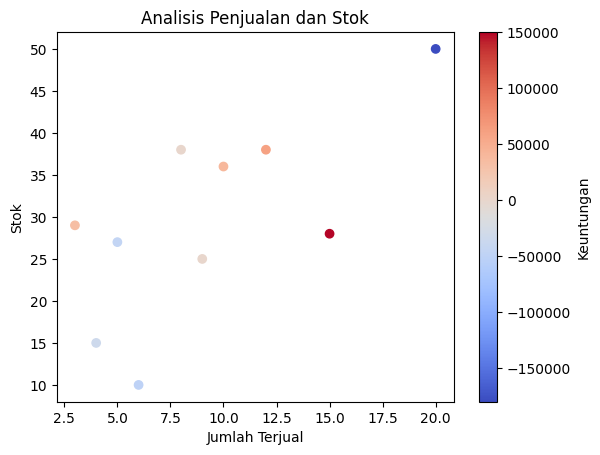

In [6]:
import matplotlib.pyplot as plt

plt.scatter (df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()